In [122]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

tf.config.list_physical_devices('GPU')

[]

In [149]:
dataset = pd.read_csv('../dataset/lung-cancer-2.csv')
dataset2 = pd.read_csv('../dataset/lung-cancer.csv')

dataset2[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']] = dataset2[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']].replace({1:0, 2:1})
dataset2[['LUNG_CANCER']] = dataset2[['LUNG_CANCER']].replace({2:0})

dataset.replace({"M":1, "F":0}, inplace=True)
dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']] = dataset[['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']].replace({1:0, 2:1})
dataset[['LUNG_CANCER']] = dataset[['LUNG_CANCER']].replace({"NO":0, "YES":1})

cut = dataset2[dataset2['LUNG_CANCER']==0]
sample = cut.sample(n=250, random_state=10)
new_dataset = pd.concat([dataset,sample])

new_dataset.drop(['YELLOW_FINGERS','PEER_PRESSURE','CHRONIC_DISEASE','ALLERGY','WHEEZING'], axis=1,inplace=True)

feature = new_dataset.drop('LUNG_CANCER',axis=1)
target = new_dataset['LUNG_CANCER']

In [151]:
target.value_counts()

0    289
1    270
Name: LUNG_CANCER, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,target,
    test_size=0.2,
    random_state=np.random.randint(10))

In [142]:
y_test.value_counts()

0    65
1    47
Name: LUNG_CANCER, dtype: int64

In [143]:
model = Sequential()

model.add(Dense(10, input_shape=(10,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
early_break = EarlyStopping(monitor='loss', patience=10)
reduce_learning_rate = ReduceLROnPlateau(patience=5)

result = model.fit(X_train, y_train, epochs = 500, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/500
23/23 [==============================] - 0s 6ms/step - loss: 1.4419 - accuracy: 0.4989 - val_loss: 1.1353 - val_accuracy: 0.4196
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.8026 - accuracy: 0.4989 - val_loss: 0.7576 - val_accuracy: 0.4196
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.4989 - val_loss: 0.7289 - val_accuracy: 0.4196
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.4989 - val_loss: 0.7152 - val_accuracy: 0.4196
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.4989 - val_loss: 0.7071 - val_accuracy: 0.4196
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6727 - accuracy: 0.4989 - val_loss: 0.7017 - val_accuracy: 0.4196
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5034 - val_loss: 0.6975 - val_accuracy: 0.4196
Epoch 8/500
2

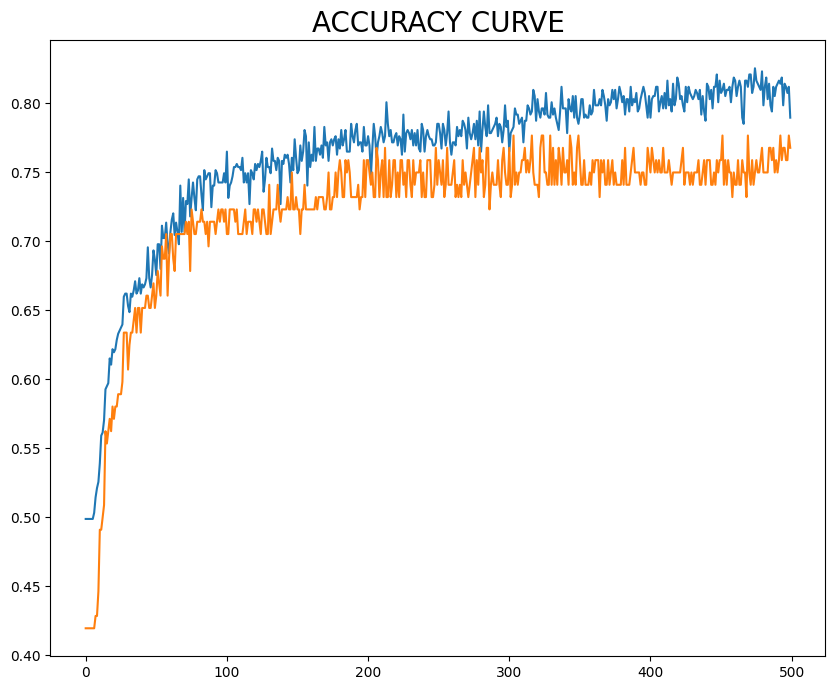

In [145]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

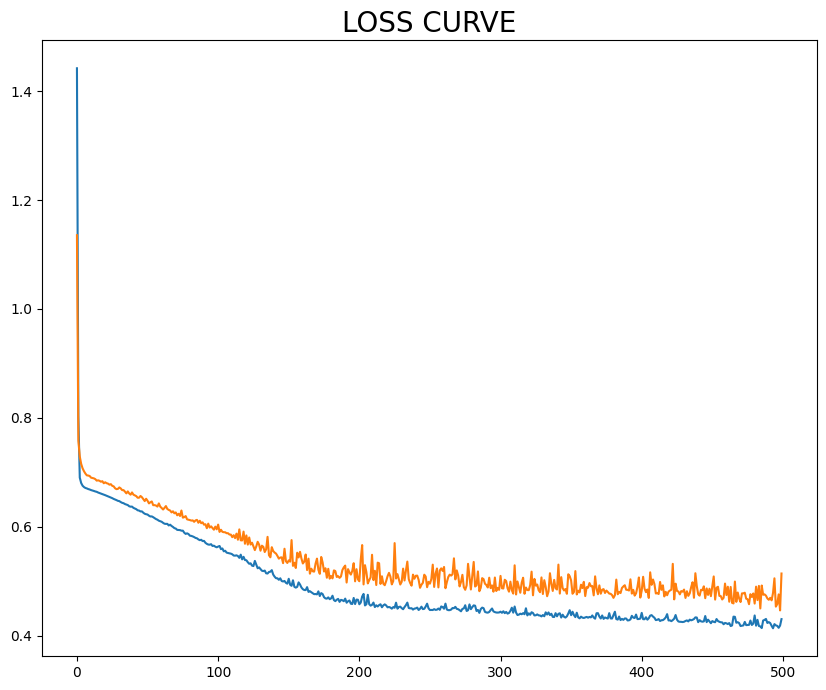

In [146]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [147]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7679


[0.5139176249504089, 0.7678571343421936]

In [148]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model\assets
